In [ ]:
# MIT License

# House Prices - Advanced Regression Techniques

Peça a um comprador de imóvel residencial para descrever a casa dos seus sonhos, e provavelmente não começará com a altura do teto do porão ou a proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados dessa competição de playground prova que influencia muito mais as negociações de preços do que o número de quartos ou uma cerca branca.
Com 79 variáveis ​​explicativas que descrevem (quase) todos os aspectos das casas residenciais em Ames, Iowa, esta competição desafia você a prever o preço final de cada casa.

Neste desafio de kaggle sua função é prever o preço de venda de cada casa. Para cada Id no conjunto de teste, você deve prever o valor da variável SalePrice. 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview 

## Objetivos de aprendizado:
Depois de fazer este Colab, você saberá como:
* Análise Exploratória de Dados (EDA)

In [1]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/pedrodiamel/dl-mini-course/blob/main/books/class_02_eda_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

## Datasets

Baixe os dados da competição deste site: [Kaggle: House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Chame as declarações de importação
O seguinte codigo importa os modulos necessários

In [ ]:
# Load the imports

# This Python 3 environment comes with many helpful analytics libraries installed

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns  # visualization tool
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
sns.set()

[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]

## Análise Exploratória de Dados (EDA)
Metodologia 

* Exploração dos dados
* Limpeza dos dados
* Análise das variáveis categóricas
* Análisis descriptivo
* Visualização

*Lembrar: Precisa carregar o house-prices-advanced-regression-techniques.zip na raiz do projeto*

In [ ]:
!unzip -n house-prices-advanced-regression-techniques.zip -d house

for dirname, _, filenames in os.walk('./house'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: house/data_description.txt  
  inflating: house/sample_submission.csv  
  inflating: house/test.csv          
  inflating: house/train.csv         
./house/sample_submission.csv
./house/test.csv
./house/train.csv
./house/data_description.txt


### Exploração dos dados

In [ ]:
# Passo 1
# Carrega os dados do dataset house-prices-advanced-regression empregando pandas (pd)
# link: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
### COMENZAR O CODIGO AQUI ### 
train_data = pd.read_csv("./house/train.csv")
### TERMINA AQUI ###

# Visualize as 15 primeiras linhas da tabela train_data
# link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head
### COMENZAR O CODIGO AQUI ### 
num_linhas = 15# ???
train_data.head(num_linhas)
### TERMINA AQUI ###

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
# Explorando os dados de teste 
# Lembrando que os dados de teste de kaggle não possuem o atributo SalePrice (label para o problema de regressão)
test_data = pd.read_csv("./house/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Explorano os dados de submisão para kaggle
submission = pd.read_csv('./house/sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


#### Análises do tipo das variáveis

In [ ]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* **SalePrice** - o preço de venda da propriedade em dólares. Esta é a variável de destino que você está tentando prever.
* **MSSubClass** : a classe de construção
* **MSZoning** : A classificação geral de zoneamento
* **LotFrontage** : metros lineares da rua conectada à propriedade
* **LotArea** : tamanho do lote em pés quadrados
* **Street** : Tipo de acesso rodoviário
* **Alley** : Tipo de acesso ao beco
* **LotShape** : forma geral da propriedade
* **LandContour** : Nivelamento da propriedade
* **Utilities** : tipos de utilitários disponíveis
* **LotConfig** : configuração do lote
* **LandSlope** : declive da propriedade
* **Neighborhood** : localizações físicas dentro dos limites da cidade de Ames
* **Condition1** : Proximidade com a estrada principal ou ferrovia
* **Condition2** : Proximidade com a estrada principal ou ferrovia (se houver uma segunda)
* **BldgType** : Tipo de habitação
* ...

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [ ]:
# Passo 2
# Imprime informação das features presentes no conjunto de trenamento
# link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info 
### COMENZAR O CODIGO AQUI ### 
train_data.info() # ???
### TERMINA AQUI ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Passo 3
# Selecione as features empregada na aula para avaliar o tipo de cada uma dela
# As features estudads são: 'LotArea', 'LotShape', 'OverallQual', 'CentralAir', 'BedroomAbvGr', 'YearBuilt'
### COMENZAR O CODIGO AQUI ### 
features = ['LotArea', 'LotShape', 'OverallQual', 'CentralAir', 'BedroomAbvGr', 'YearBuilt']
train_data[features].info()
### TERMINA AQUI ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   LotShape      1460 non-null   object
 2   OverallQual   1460 non-null   int64 
 3   CentralAir    1460 non-null   object
 4   BedroomAbvGr  1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


### Missing value 

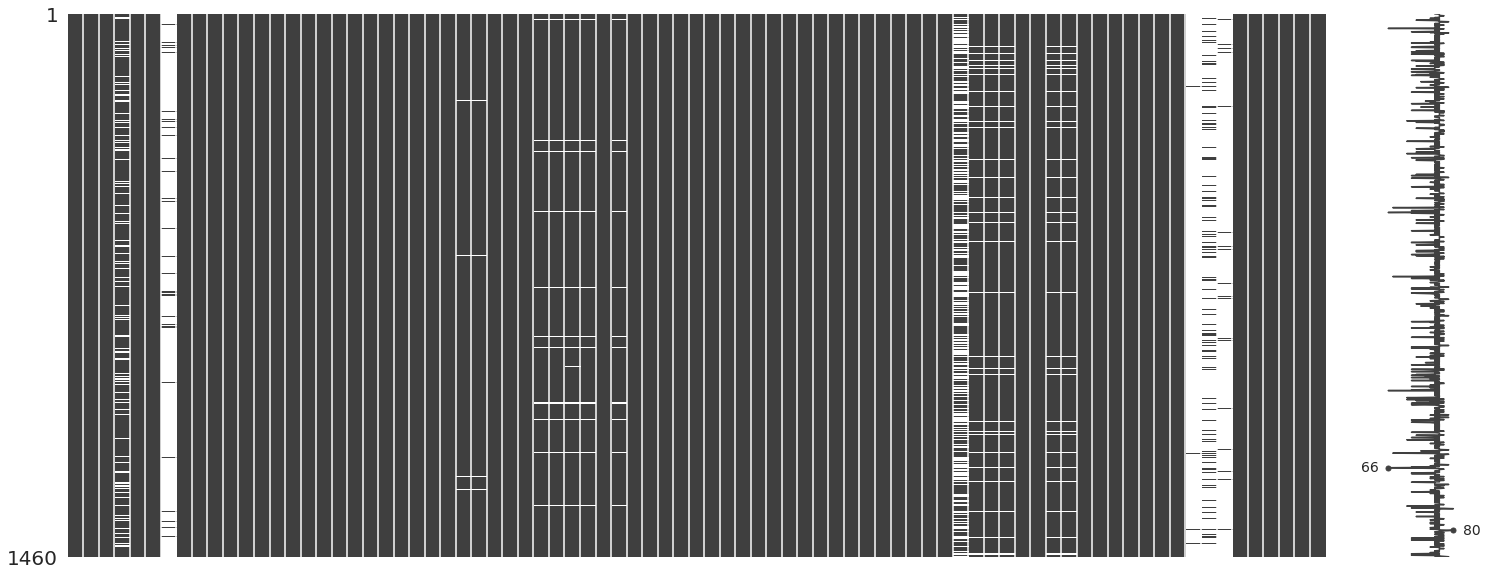

In [ ]:
# Passo 4
# Visualize os dados faltantes no conjunto de trenamento
# Para visualizar os dados faltantes ou missing value pode empregar a função matrix do pacote python missingno
# link: https://github.com/ResidentMario/missingno 
### COMENZAR O CODIGO AQUI ### 
msno.matrix(train_data) # ???
### COMENZAR O CODIGO AQUI ### 
plt.show()

In [ ]:
# Obtener os nome dos das colunas com dados faltantes
cols_with_missing = [col for col in train_data.columns if train_data[col].isnull().any()]
cols_with_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

**1- Drop Columns with Missing Values**

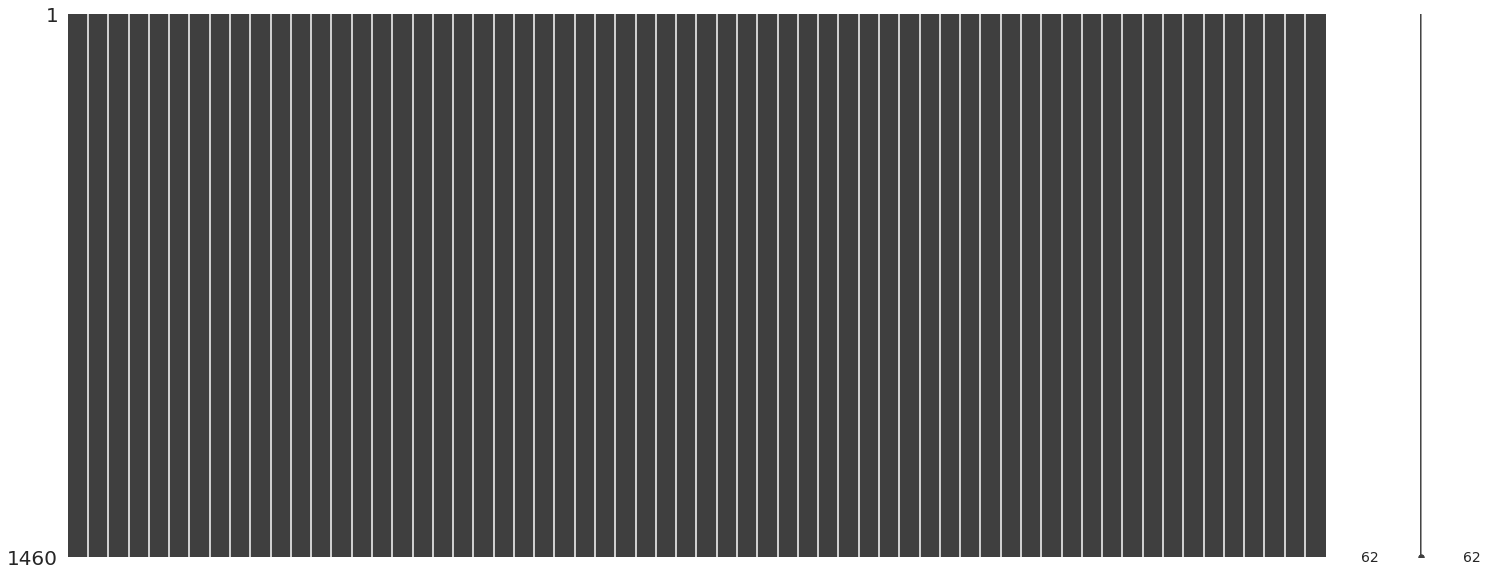

In [ ]:
# Passo 5
# Elimina as colunas com dados faltantes
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
### COMENZAR O CODIGO AQUI ### 
reduce_train_data = train_data.drop(cols_with_missing, axis=1)
### COMENZAR O CODIGO AQUI ### 

# Visualize os dados faltantes no conjunto obtido
msno.matrix(reduce_train_data)
plt.show()

**2 - Imputation**

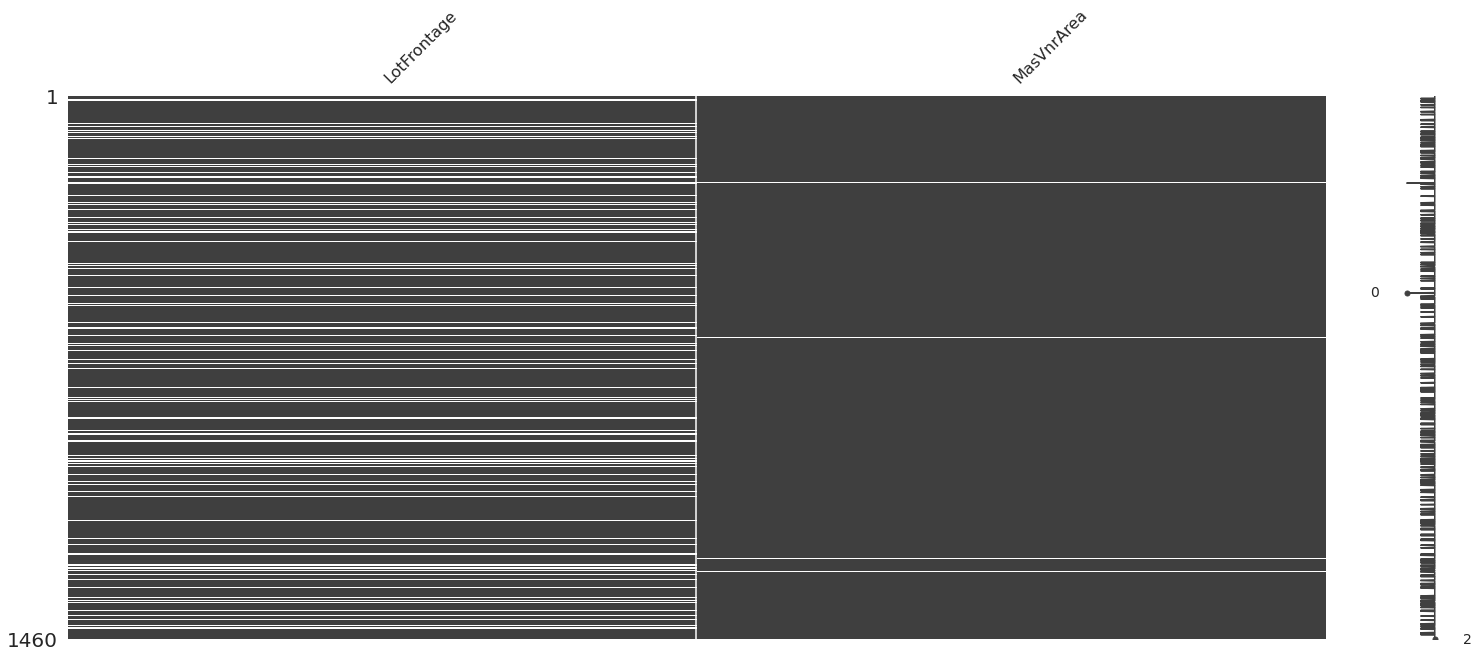

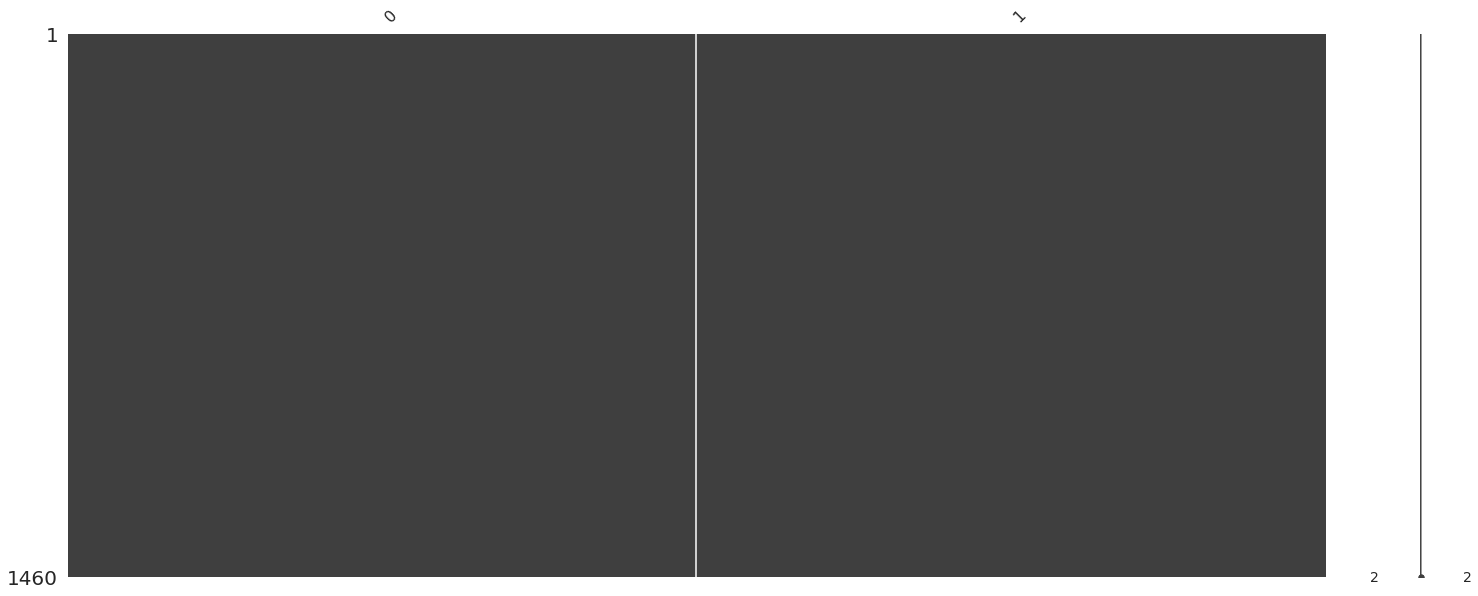

In [ ]:
from sklearn.impute import SimpleImputer

# Passo 6
# Selecione duas variáveis de tipo numéricas com dados faltantes
# Por exemplo: 'LotFrontage', 'MasVnrArea'
### COMENZAR O CODIGO AQUI ### 
features = ['LotFrontage', 'MasVnrArea']
missing_train_data = train_data[features]
### TERMINA AQUI ###

# Passo 7
# Empregando SimpleImputer() aplica o abordagem de imputação 
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
# https://scikit-learn.org/stable/modules/impute.html#impute 
### COMENZAR O CODIGO AQUI ### 
my_imputer = SimpleImputer()
imputed_train_data = pd.DataFrame(my_imputer.fit_transform(missing_train_data))
### TERMINA AQUI ###

# Visualize os dados faltantes no conjunto obtido
msno.matrix(missing_train_data)
plt.show()
msno.matrix(imputed_train_data)
plt.show()

**3 - An Extension To Imputation**

In [ ]:

# Make copy to avoid changing original data (when imputing)
missing_train_data_plus = missing_train_data.copy()

# Passo 8
# Faça novas colunas indicando o que será imputado
for col in features:
    ### COMENZAR O CODIGO AQUI ### 
    missing_train_data_plus[col + '_was_missing'] = missing_train_data_plus[col].isnull()
    ### TERMINA AQUI ###

print(missing_train_data_plus)

# Imputation
my_imputer = SimpleImputer()
imputed_train_data_plus = pd.DataFrame(my_imputer.fit_transform(missing_train_data_plus))


      LotFrontage  MasVnrArea  LotFrontage_was_missing  MasVnrArea_was_missing
0            65.0       196.0                    False                   False
1            80.0         0.0                    False                   False
2            68.0       162.0                    False                   False
3            60.0         0.0                    False                   False
4            84.0       350.0                    False                   False
...           ...         ...                      ...                     ...
1455         62.0         0.0                    False                   False
1456         85.0       119.0                    False                   False
1457         66.0         0.0                    False                   False
1458         68.0         0.0                    False                   False
1459         75.0         0.0                    False                   False

[1460 rows x 4 columns]


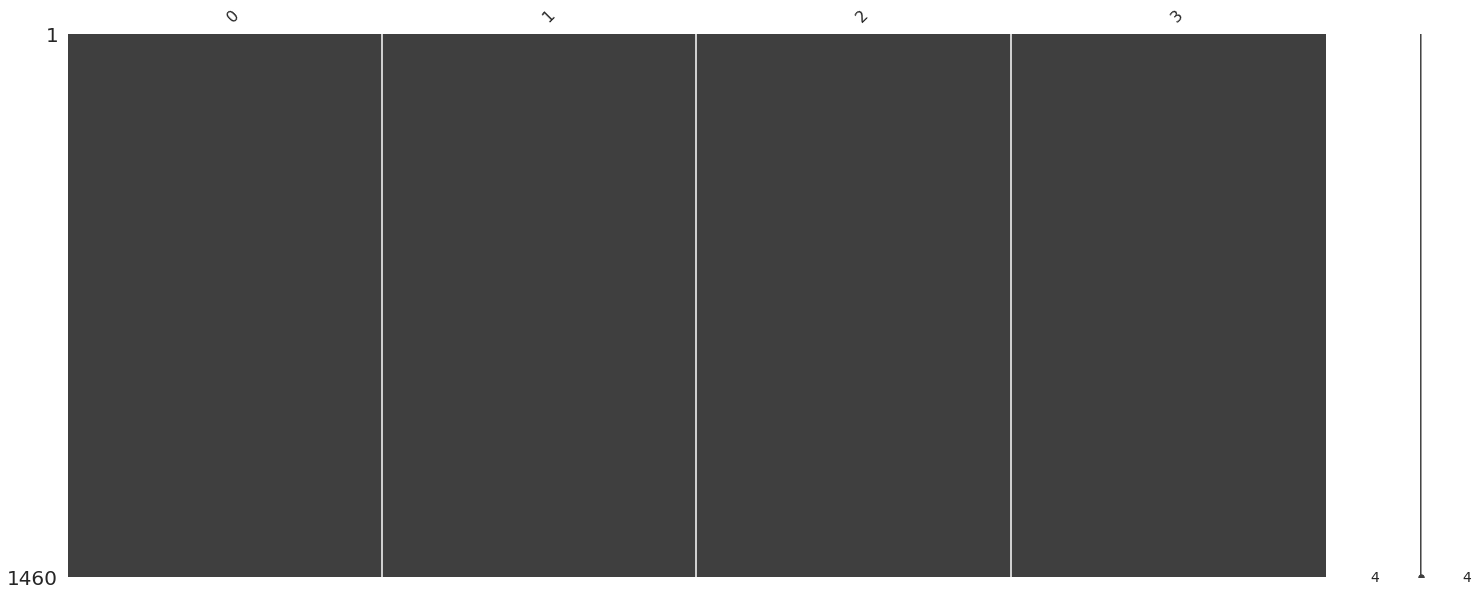

In [ ]:
# Visualize os dados faltantes no conjunto obtido
msno.matrix(imputed_train_data_plus)
plt.show()

### Análise das variáveis categóricas

**Ordinal Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

features_cat_ord = ['LotShape']
train_data_LotShape = train_data[features_cat_ord]

# Passo 9 
# Aplicar ordinal encoder na variável LotShape selecionada
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
### COMENZAR O CODIGO AQUI ### 
ordinal_encoder = OrdinalEncoder()
train_data_LotShape = ordinal_encoder.fit_transform(train_data_LotShape)
### TERMINA AQUI ###

train_data_LotShape

array([[3.],
       [3.],
       [0.],
       ...,
       [3.],
       [3.],
       [3.]])

**One-Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

features_cat_ord = ['LotShape']
train_data_LotShape = train_data[features_cat_ord]

# Passo 10 
# Aplicar one-hot encoder na variável LotShape selecionada
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html 
### COMENZAR O CODIGO AQUI ### 
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_data_LotShape_oh = pd.DataFrame(OH_encoder.fit_transform(train_data_LotShape))
### TERMINA AQUI ###

train_data_LotShape_oh

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
1455,0.0,0.0,0.0,1.0
1456,0.0,0.0,0.0,1.0
1457,0.0,0.0,0.0,1.0
1458,0.0,0.0,0.0,1.0


### Visualização

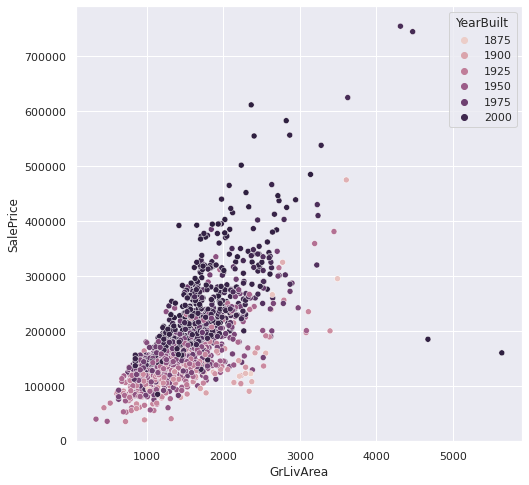

In [ ]:
# Variáveis selecionadas
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
train_data_select = train_data[features]

# Passo 11
# Use scatterplot para visualizar as variáveis GrLivArea, SalePrice, YearBuilt
# nos eixos x, y, e heu de train_data_select
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html

plt.figure(figsize=(8,8))
### COMENZAR O CODIGO AQUI ### 
sns.scatterplot(data=train_data_select, x="GrLivArea", y="SalePrice", hue="YearBuilt")
### TERMINA AQUI ###
plt.show()

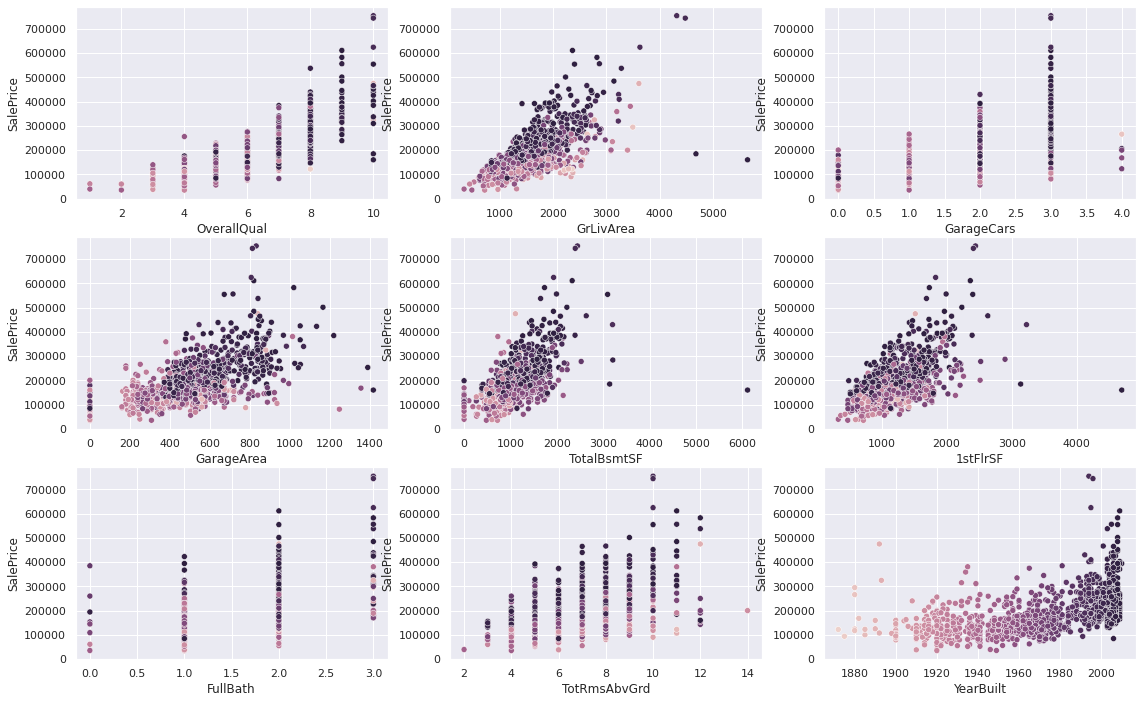

In [ ]:
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (19,12)

# Passo 12
# Visualize todas as variáveis selecionadas empregando scatterplot
# # https://seaborn.pydata.org/generated/seaborn.scatterplot.html
numRows = 3; numCols = 3
plt.figure()
for k in range(numRows*numCols):
  plt.subplot(numRows,numCols,k+1)
  ### COMENZAR O CODIGO AQUI ### 
  sns.scatterplot(data=train_data_select, x=features[k+1], y="SalePrice", hue="YearBuilt", legend=None)
  ### TERMINA AQUI ###

plt.show()

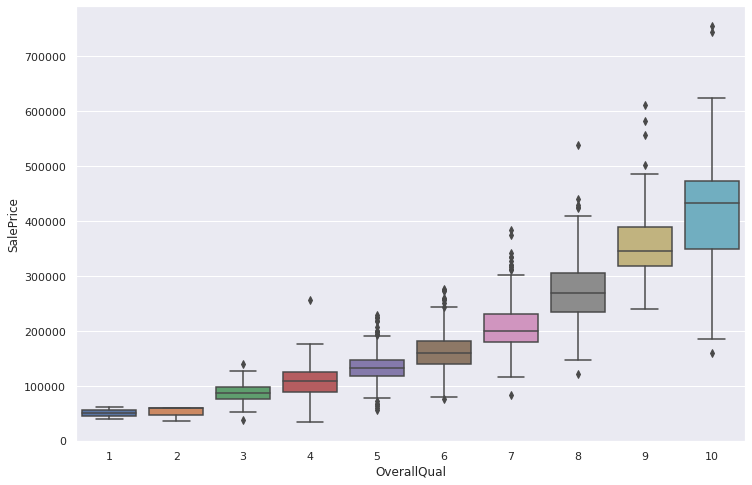

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train_data_select, y="SalePrice", x="OverallQual")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


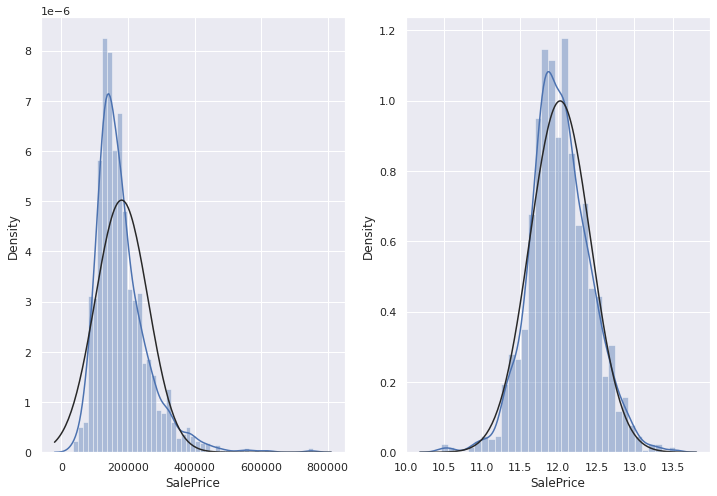

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

y_train = train_data['SalePrice']
y_train_log = np.log1p(y_train)  # log(x+1)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.distplot(y_train, fit=norm);
plt.subplot(1,2,2)
sns.distplot(y_train_log, fit=norm);

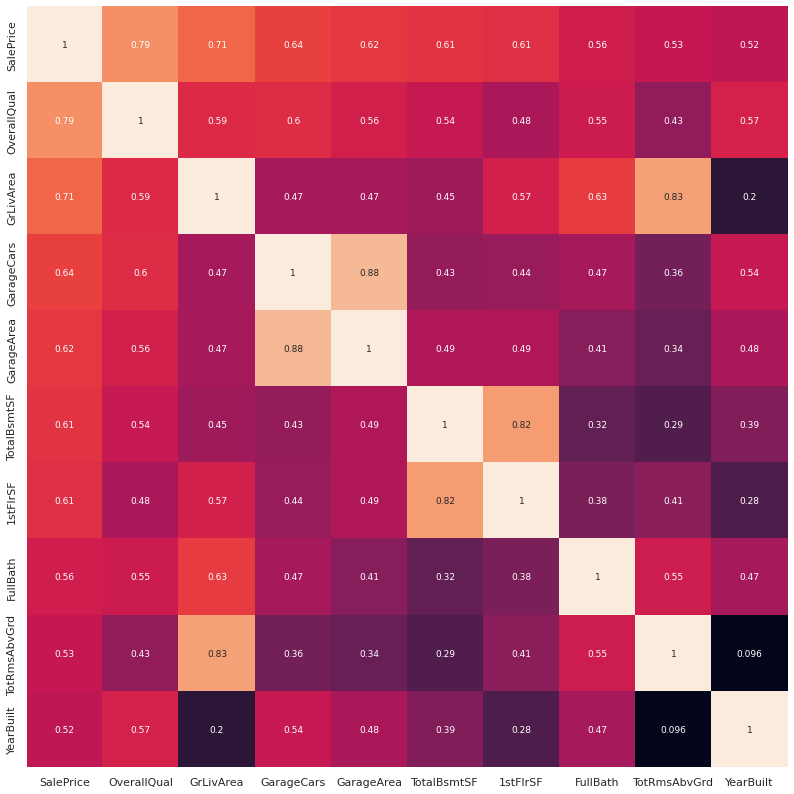

In [ ]:
# Passo 13
# Visualize a matriz de correlação para as variáveis selecionadas
### COMENZAR O CODIGO AQUI ### 
corrmat = train_data_select.corr()
### TERMINA AQUI ###

# Visualizar o resultado
plt.figure(figsize=(22,14))
sns.heatmap(corrmat, square=True, annot=True, cbar=False)
plt.show()

# EXERCÍCIOS RECOMENDADOS

Estudar os notebooks de kaggle para EDA do dataset House Prices e propor novos insights a partir do aprendizado nesses notebooks. 

* https://www.kaggle.com/code/dansbecker/handling-missing-values
* https://www.kaggle.com/code/dgawlik/house-prices-eda 
* https://www.kaggle.com/code/notaapple/detailed-exploratory-data-analysis-using-r
* https://www.kaggle.com/code/dejavu23/house-prices-eda-to-ml-beginner 
* https://www.kaggle.com/code/gaetanlopez/how-to-make-clean-visualizations 

In [ ]:
# Code here